In [1]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_columns",40)

In [3]:
career_df=pd.read_csv("data/total_career_stats_of_players_df.csv")

In [4]:
career_df.head()

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
0,Chandler Parsons,435,369,30.3,4.9,10.6,0.462,1.6,4.2,0.373,3.3,6.4,0.522,0.537,1.4,2.0,0.713,0.8,3.7,4.5,2.8,0.9,0.3,1.5,2.0,12.8,F
1,Evan Turner,686,295,27.2,4.0,9.1,0.435,0.4,1.3,0.296,3.6,7.8,0.458,0.456,1.5,2.0,0.781,0.6,4.2,4.7,3.5,0.8,0.3,1.8,2.0,9.9,G
2,Allen Crabbe,344,112,24.6,3.4,7.9,0.429,1.7,4.3,0.393,1.7,3.6,0.472,0.536,1.1,1.3,0.835,0.3,2.6,2.9,1.2,0.6,0.3,0.8,2.1,9.5,G
3,DeAndre' Bembry,146,19,18.9,2.6,5.8,0.445,0.4,1.5,0.281,2.1,4.3,0.504,0.482,0.8,1.3,0.605,0.5,2.8,3.3,1.9,0.9,0.4,1.4,1.7,6.3,F
4,Damian Jones,49,22,11.9,1.5,2.3,0.643,0.0,0.0,0.000,1.5,2.3,0.643,0.643,0.6,1.1,0.577,0.9,1.4,2.3,0.6,0.3,0.7,0.5,1.9,3.6,F


In [5]:
career_df.shape

(371, 27)

In [6]:
stats_df = pd.read_csv("data/total_stats_of_players_df.csv")

In [7]:
stats_df.head()

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,Chandler Parsons,34,34,19.9,2.2,6.5,0.338,0.7,2.7,0.269,1.5,3.8,0.388,0.394,1.0,1.3,0.814,0.2,2.3,2.5,1.6,0.6,0.1,0.7,1.5,6.2
1,Chandler Parsons,36,8,19.2,3.0,6.5,0.462,1.4,3.4,0.421,1.6,3.1,0.504,0.571,0.5,0.8,0.630,0.4,2.1,2.5,1.9,0.5,0.3,1.0,1.5,7.9
2,Chandler Parsons,25,3,19.8,2.7,7.3,0.374,1.2,3.8,0.309,1.6,3.5,0.443,0.453,0.9,1.0,0.880,0.2,2.6,2.8,1.7,0.8,0.2,1.3,1.8,7.5
3,Evan Turner,65,12,25.5,3.6,8.5,0.426,0.5,1.8,0.263,3.1,6.7,0.470,0.454,1.3,1.6,0.825,0.6,3.2,3.8,3.2,0.8,0.4,1.5,1.9,9.0
4,Evan Turner,79,40,25.7,3.3,7.3,0.447,0.5,1.7,0.318,2.7,5.6,0.485,0.484,1.2,1.4,0.850,0.4,2.7,3.1,2.2,0.6,0.4,1.3,2.1,8.2


In [8]:
stats_df.shape

(908, 26)

In [9]:
pd.read_csv("data/player_df_no_rooks.csv").drop_duplicates().shape
#making sure every player is in careers

(370, 5)

In [10]:
stats_df.shape

(908, 26)

In [11]:
career_df.drop_duplicates(inplace=True)

##### Noticed shapes do not match. Had to find the duplicated player

In [12]:
career_df.shape

(371, 27)

In [13]:
career_df[career_df['name'].duplicated()]

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
149,Rodney Hood,320,227,27.2,4.5,10.7,0.422,1.7,4.7,0.367,2.8,6.1,0.465,0.502,1.8,2.1,0.841,0.3,2.5,2.8,1.9,0.8,0.2,1.1,2.2,12.6,G


In [14]:
career_df.loc[career_df['name'].str.contains('Hood'),'name']

148    Rodney Hood
149    Rodney Hood
Name: name, dtype: object

##### Saw that the isduplicated didn't exactly work. Saw that positions were different in both entries.

In [15]:
career_df.iloc[148]

name                               Rodney Hood
games                                      320
games_start                                227
minutes_played                            27.2
field_goals                                4.5
field_goals_attempted                     10.7
field_goal_percentage                    0.422
3_pointers                                 1.7
3_pointers_attempted                       4.7
3pt_percentage                           0.367
2_pointers                                 2.8
2_pointers_attempted                       6.1
2pt_percentage                           0.465
effective_field_goal_percentage          0.502
free_throws                                1.8
free_throws_attempted                      2.1
free_throw_percentage                    0.841
offensive_rebounds                         0.3
defensive_rebounds                         2.5
total_rebounds                             2.8
assists                                    1.9
steals       

In [16]:
career_df.iloc[149]

name                               Rodney Hood
games                                      320
games_start                                227
minutes_played                            27.2
field_goals                                4.5
field_goals_attempted                     10.7
field_goal_percentage                    0.422
3_pointers                                 1.7
3_pointers_attempted                       4.7
3pt_percentage                           0.367
2_pointers                                 2.8
2_pointers_attempted                       6.1
2pt_percentage                           0.465
effective_field_goal_percentage          0.502
free_throws                                1.8
free_throws_attempted                      2.1
free_throw_percentage                    0.841
offensive_rebounds                         0.3
defensive_rebounds                         2.5
total_rebounds                             2.8
assists                                    1.9
steals       

In [17]:
career_df.drop(148,inplace=True)

In [18]:
career_df.reset_index(inplace=True,drop=True)

In [19]:
career_df.iloc[148]

name                               Rodney Hood
games                                      320
games_start                                227
minutes_played                            27.2
field_goals                                4.5
field_goals_attempted                     10.7
field_goal_percentage                    0.422
3_pointers                                 1.7
3_pointers_attempted                       4.7
3pt_percentage                           0.367
2_pointers                                 2.8
2_pointers_attempted                       6.1
2pt_percentage                           0.465
effective_field_goal_percentage          0.502
free_throws                                1.8
free_throws_attempted                      2.1
free_throw_percentage                    0.841
offensive_rebounds                         0.3
defensive_rebounds                         2.5
total_rebounds                             2.8
assists                                    1.9
steals       

In [20]:
career_df.shape

(370, 27)

In [21]:
stats_df['name'].unique()

array(['Chandler Parsons', 'Evan Turner', 'Allen Crabbe',
       "DeAndre' Bembry", 'Damian Jones', 'John Collins', 'Trae Young',
       'Kevin Huerter', 'Alex Len', 'Jabari Parker', 'Jaylen Brown',
       'Jayson Tatum', 'Gordon Hayward', 'Semi Ojeleye',
       'Robert Williams', 'Marcus Smart', 'Kemba Walker', 'Daniel Theis',
       'Enes Kanter', 'Brad Wanamaker', 'Denzel Valentine', 'Kris Dunn',
       'Lauri Markkanen', 'Cristiano Felício', 'Otto Porter',
       'Chandler Hutchison', 'Wendell Carter Jr.', 'Zach LaVine',
       'Antonio Blakeney', 'Tomáš Satoranský', 'Thaddeus Young',
       'Ryan Arcidiacono', 'Luke Kornet', 'Shaquille Harrison',
       'John Henson', 'Brandon Knight', 'Tristan Thompson',
       'Jordan Clarkson', 'Bam Adebayo', 'James Johnson', 'Dion Waiters',
       'Kelly Olynyk', 'Derrick Jones Jr.', 'Justise Winslow',
       'Yante Maten', 'Duncan Robinson', 'Jimmy Butler',
       'Giannis Antetokounmpo', 'D.J. Wilson', 'Sterling Brown',
       'Donte DiVince

In [22]:
stats_df.head(2)

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,Chandler Parsons,34,34,19.9,2.2,6.5,0.338,0.7,2.7,0.269,1.5,3.8,0.388,0.394,1.0,1.3,0.814,0.2,2.3,2.5,1.6,0.6,0.1,0.7,1.5,6.2
1,Chandler Parsons,36,8,19.2,3.0,6.5,0.462,1.4,3.4,0.421,1.6,3.1,0.504,0.571,0.5,0.8,0.630,0.4,2.1,2.5,1.9,0.5,0.3,1.0,1.5,7.9


In [23]:
stats_df.columns

Index(['name', 'games', 'games_start', 'minutes_played', 'field_goals',
       'field_goals_attempted', 'field_goal_percentage', '3_pointers',
       '3_pointers_attempted', '3pt_percentage', '2_pointers',
       '2_pointers_attempted', '2pt_percentage',
       'effective_field_goal_percentage', 'free_throws',
       'free_throws_attempted', 'free_throw_percentage', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'personal_fouls', 'points'],
      dtype='object')

In [24]:
stats_df[stats_df['name']=='Chandler Parsons']['name'][0]

'Chandler Parsons'

##### The following code is to make the 3 year aggregate stats dataframe
<hr>

In [25]:
aggs=[]
for name in stats_df['name'].unique()[0:]:
    player={}
    player['name']=name
    player['games']= int(round(stats_df[stats_df['name']==name]['games'].mean(),0))
    player['games_start'] =int(round(stats_df[stats_df['name']==name]['games_start'].mean(),0))
    player['minutes_played'] =round(stats_df[stats_df['name']==name]['minutes_played'].mean(),0)
    player['field_goals'] =round(stats_df[stats_df['name']==name]['field_goals'].mean(),2)
    player['field_goals_attempted'] =round(stats_df[stats_df['name']==name]['field_goals_attempted'].mean(),2)
    player['field_goal_percentage'] =round(stats_df[stats_df['name']==name]['field_goal_percentage'].mean(),3)
    player['3_pointers'] =round(stats_df[stats_df['name']==name]['3_pointers'].mean(),2)
    player['3_pointers_attempted'] =round(stats_df[stats_df['name']==name]['3_pointers_attempted'].mean(),2)
    player['3pt_percentage'] =round(stats_df[stats_df['name']==name]['3pt_percentage'].mean(),3)
    player['2_pointers'] =round(stats_df[stats_df['name']==name]['2_pointers'].mean(),2)
    player['2_pointers_attempted'] =round(stats_df[stats_df['name']==name]['2_pointers_attempted'].mean(),2)
    player['2pt_percentage'] =round(stats_df[stats_df['name']==name]['2pt_percentage'].mean(),3)
    player['effective_field_goal_percentage'] =round(stats_df[stats_df['name']==name]['effective_field_goal_percentage'].mean(),3)
    player['free_throws'] =round(stats_df[stats_df['name']==name]['free_throws'].mean(),2)
    player['free_throws_attempted'] =round(stats_df[stats_df['name']==name]['free_throws_attempted'].mean(),2)
    player['free_throw_percentage'] =round(stats_df[stats_df['name']==name]['free_throw_percentage'].mean(),3)
    player['offensive_rebounds'] =round(stats_df[stats_df['name']==name]['offensive_rebounds'].mean(),2)
    player['defensive_rebounds'] =round(stats_df[stats_df['name']==name]['defensive_rebounds'].mean(),2)
    player['total_rebounds'] =round(stats_df[stats_df['name']==name]['total_rebounds'].mean(),2)
    player['assists'] =round(stats_df[stats_df['name']==name]['assists'].mean(),2)
    player['steals'] =round(stats_df[stats_df['name']==name]['steals'].mean(),2)
    player['blocks'] =round(stats_df[stats_df['name']==name]['blocks'].mean(),2)
    player['turnovers'] =round(stats_df[stats_df['name']==name]['turnovers'].mean(),2)
    player['personal_fouls'] =round(stats_df[stats_df['name']==name]['personal_fouls'].mean(),2)
    player['points'] =round(stats_df[stats_df['name']==name]['points'].mean(),2)
    aggs.append(player)
    
#    print(player)

In [26]:
agg_df=pd.DataFrame(aggs)

In [27]:
agg_df.head()

,2_pointers,2_pointers_attempted,2pt_percentage,3_pointers,3_pointers_attempted,3pt_percentage,assists,blocks,defensive_rebounds,effective_field_goal_percentage,field_goal_percentage,field_goals,field_goals_attempted,free_throw_percentage,free_throws,free_throws_attempted,games,games_start,minutes_played,name,offensive_rebounds,personal_fouls,points,steals,total_rebounds,turnovers
0,1.57,3.47,0.445,1.10,3.30,0.333,1.73,0.20,2.33,0.473,0.391,2.63,6.77,0.775,0.80,1.03,32,15,20.0,Chandler Parsons,0.27,1.60,7.20,0.63,2.60,1.00
1,2.80,5.90,0.483,0.40,1.40,0.264,3.10,0.33,3.30,0.470,0.444,3.23,7.30,0.794,1.17,1.50,72,18,24.0,Evan Turner,0.50,1.83,8.00,0.63,3.80,1.47
2,1.60,3.67,0.431,2.23,5.63,0.400,1.30,0.37,3.20,0.533,0.414,3.83,9.30,0.810,1.27,1.57,66,32,28.0,Allen Crabbe,0.33,2.27,11.17,0.60,3.53,0.97
3,1.83,3.77,0.504,0.33,1.27,0.237,1.70,0.37,2.47,0.476,0.447,2.20,5.00,0.530,0.67,1.13,49,6,17.0,DeAndre' Bembry,0.47,1.47,5.43,0.77,2.93,1.30
4,1.23,2.07,0.572,0.00,0.00,0.000,0.43,0.53,1.27,0.572,0.572,1.23,2.07,0.516,0.50,0.93,16,7,10.0,Damian Jones,0.83,1.67,3.00,0.23,2.10,0.53


In [28]:
agg_df=agg_df[['name', 'games', 'games_start', 'minutes_played', 'field_goals',
       'field_goals_attempted', 'field_goal_percentage', '3_pointers',
       '3_pointers_attempted', '3pt_percentage', '2_pointers',
       '2_pointers_attempted', '2pt_percentage',
       'effective_field_goal_percentage', 'free_throws',
       'free_throws_attempted', 'free_throw_percentage', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'personal_fouls', 'points']]

In [29]:
agg_df.to_csv("data/3_season_avg_df.csv",index=False)

In [30]:
three_season_avg_df = pd.read_csv('data/3_season_avg_df.csv')

In [31]:
three_season_avg_df.head()

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,Chandler Parsons,32,15,20.0,2.63,6.77,0.391,1.10,3.30,0.333,1.57,3.47,0.445,0.473,0.80,1.03,0.775,0.27,2.33,2.60,1.73,0.63,0.20,1.00,1.60,7.20
1,Evan Turner,72,18,24.0,3.23,7.30,0.444,0.40,1.40,0.264,2.80,5.90,0.483,0.470,1.17,1.50,0.794,0.50,3.30,3.80,3.10,0.63,0.33,1.47,1.83,8.00
2,Allen Crabbe,66,32,28.0,3.83,9.30,0.414,2.23,5.63,0.400,1.60,3.67,0.431,0.533,1.27,1.57,0.810,0.33,3.20,3.53,1.30,0.60,0.37,0.97,2.27,11.17
3,DeAndre' Bembry,49,6,17.0,2.20,5.00,0.447,0.33,1.27,0.237,1.83,3.77,0.504,0.476,0.67,1.13,0.530,0.47,2.47,2.93,1.70,0.77,0.37,1.30,1.47,5.43
4,Damian Jones,16,7,10.0,1.23,2.07,0.572,0.00,0.00,0.000,1.23,2.07,0.572,0.572,0.50,0.93,0.516,0.83,1.27,2.10,0.43,0.23,0.53,0.53,1.67,3.00


In [32]:
three_season_avg_df['pos']=career_df['pos']

In [33]:
three_season_avg_df['pos'].value_counts()

G    176
F    143
C     51
Name: pos, dtype: int64

In [34]:
career_df['pos'].value_counts()

G    176
F    143
C     51
Name: pos, dtype: int64

In [35]:
def position_to_numeric(position):
    #Positions in basketball are referred to by the following
    # point guards = 1
    # shooting guards = 2
    # small forward = 3
    # power forward = 4
    # center = 5
    #since we only have guard,forward,center using 1,3,5
    if position == 'G':
        return 1
    elif position == 'F':
        return 3
    elif position == 'C':
        return 5
        
    

In [36]:
career_df['pos']=career_df['pos'].apply(lambda x: position_to_numeric(x))

In [37]:
three_season_avg_df['pos'] = three_season_avg_df['pos'].apply(lambda x: position_to_numeric(x))

### <u> Recommender A</u>
<hr>

In [38]:
similarities=pairwise_distances(three_season_avg_df.drop('name',axis=1),metric='cosine')

In [39]:
#similarities_df = 
three_season_avg_recommender=pd.DataFrame(similarities,
             columns=three_season_avg_df['name'],
            index=three_season_avg_df['name'])

In [40]:
three_season_avg_recommender.head()

name,Chandler Parsons,Evan Turner,Allen Crabbe,DeAndre' Bembry,Damian Jones,John Collins,Trae Young,Kevin Huerter,Alex Len,Jabari Parker,Jaylen Brown,Jayson Tatum,Gordon Hayward,Semi Ojeleye,Robert Williams,Marcus Smart,Kemba Walker,Daniel Theis,Enes Kanter,Brad Wanamaker,...,Rajon Rondo,Avery Bradley,Jae Crowder,Solomon Hill,Miles Plumlee,Josh Jackson,Andre Iguodala,Dillon Brooks,Ivan Rabb,Jaren Jackson Jr.,Grayson Allen,Kyle Anderson,Dwight Howard,Yuta Watanabe,De'Anthony Melton,Bruno Caboclo,Tyus Jones,Jonas Valančiūnas,Goran Dragić,Meyers Leonard
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chandler Parsons,2.220446e-16,0.042906,0.015584,0.060825,1.198801e-02,0.026793,0.080321,0.058092,0.045545,0.009518,0.028963,0.081980,0.018310,0.136209,0.099681,0.018765,0.070256,0.120929,0.028453,0.112824,...,0.034826,0.053412,0.025269,0.025475,0.041701,0.029682,0.070160,0.029953,0.047274,0.065342,0.088511,0.039134,0.068240,0.074094,0.033788,0.008036,0.081167,0.071438,0.049944,0.100851
Evan Turner,4.290603e-02,0.000000,0.022897,0.007855,4.650969e-02,0.046855,0.129680,0.080048,0.008440,0.050866,0.024495,0.127692,0.050289,0.033981,0.022415,0.016079,0.130443,0.028988,0.027125,0.028577,...,0.070906,0.126123,0.033124,0.050998,0.016309,0.011355,0.010845,0.067897,0.003072,0.118500,0.020894,0.046188,0.131008,0.090990,0.042924,0.043049,0.008550,0.103497,0.114174,0.016580
Allen Crabbe,1.558426e-02,0.022897,0.000000,0.049936,3.064201e-02,0.012472,0.055202,0.025913,0.017642,0.026410,0.004166,0.053889,0.009787,0.101066,0.080580,0.001906,0.052521,0.094596,0.013133,0.094231,...,0.022079,0.047821,0.003712,0.010833,0.016974,0.007140,0.056007,0.015775,0.031785,0.046237,0.071719,0.013047,0.058715,0.121446,0.009678,0.031033,0.051551,0.043152,0.043121,0.070214
DeAndre' Bembry,6.082491e-02,0.007855,0.049936,0.000000,5.855700e-02,0.083186,0.191288,0.131593,0.024824,0.070234,0.055309,0.188937,0.086250,0.018902,0.007351,0.041085,0.189851,0.012168,0.053330,0.010088,...,0.114935,0.181208,0.065676,0.087795,0.035552,0.034411,0.002589,0.112616,0.006233,0.176238,0.007773,0.085846,0.186879,0.067307,0.081935,0.049419,0.007126,0.159532,0.166683,0.008446
Damian Jones,1.198801e-02,0.046510,0.030642,0.058557,1.110223e-16,0.033175,0.102385,0.074441,0.043518,0.021007,0.038385,0.097331,0.031633,0.131445,0.085630,0.030613,0.095447,0.111531,0.029185,0.111816,...,0.045216,0.072174,0.036103,0.032975,0.035154,0.038894,0.070391,0.044431,0.044285,0.079980,0.094590,0.044044,0.074845,0.073147,0.043802,0.016095,0.081519,0.081076,0.067499,0.100309


# Eye testing

In [41]:
query = 'Dario'#input("name your player of interest: ")
three_season_avg_df.loc[three_season_avg_df['name'].str.contains(query),'name']

127    Dario Šarić
Name: name, dtype: object

In [42]:
round(three_season_avg_recommender['Evan Turner'].sort_values()[0:10],4)

name
Evan Turner         0.0000
Dwayne Bacon        0.0012
Yogi Ferrell        0.0015
Frank Jackson       0.0020
Denzel Valentine    0.0020
Élie Okobo          0.0021
Ish Smith           0.0023
Kelly Olynyk        0.0023
Mario Hezonja       0.0025
Frank Ntilikina     0.0025
Name: Evan Turner, dtype: float64

In [43]:
three_season_avg_df[three_season_avg_df['name']=='Evan Turner']

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
1,Evan Turner,72,18,24.0,3.23,7.3,0.444,0.4,1.4,0.264,2.8,5.9,0.483,0.47,1.17,1.5,0.794,0.5,3.3,3.8,3.1,0.63,0.33,1.47,1.83,8.0,1


In [44]:
three_season_avg_df[three_season_avg_df['name']=='Dwayne Bacon']

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
235,Dwayne Bacon,48,10,16.0,2.1,4.8,0.425,0.55,1.4,0.347,1.6,3.4,0.452,0.476,0.6,0.8,0.77,0.15,2.1,2.2,0.9,0.3,0.05,0.4,1.3,5.3,1


In [45]:
round(three_season_avg_recommender['Chandler Parsons'].sort_values()[0:10],4)

name
Chandler Parsons    0.0000
Justise Winslow     0.0076
Will Barton         0.0080
Bruno Caboclo       0.0080
Brandon Knight      0.0089
Jabari Parker       0.0095
Luke Kornet         0.0101
Rudy Gay            0.0111
Eric Gordon         0.0117
Damian Jones        0.0120
Name: Chandler Parsons, dtype: float64

In [46]:
three_season_avg_df[three_season_avg_df['name']=='Chandler Parsons']

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
0,Chandler Parsons,32,15,20.0,2.63,6.77,0.391,1.1,3.3,0.333,1.57,3.47,0.445,0.473,0.8,1.03,0.775,0.27,2.33,2.6,1.73,0.63,0.2,1.0,1.6,7.2,3


In [47]:
three_season_avg_df[three_season_avg_df['name']=='Will Barton']

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
278,Will Barton,61,32,30.0,4.97,11.5,0.432,1.67,4.57,0.361,3.33,6.93,0.48,0.504,1.97,2.57,0.776,0.87,3.83,4.63,3.47,0.73,0.53,1.63,1.93,13.63,1


In [48]:
round(three_season_avg_recommender['Zach LaVine'].sort_values()[0:10],4)

name
Zach LaVine         0.0000
Mike Conley         0.0032
Kawhi Leonard       0.0033
John Wall           0.0034
Dion Waiters        0.0044
DeMarcus Cousins    0.0072
Danilo Gallinari    0.0073
Devin Booker        0.0078
Isaiah Thomas       0.0079
Victor Oladipo      0.0083
Name: Zach LaVine, dtype: float64

In [49]:
round(three_season_avg_recommender['Donovan Mitchell'].sort_values()[0:10],4)

name
Donovan Mitchell    0.0000
CJ McCollum         0.0005
Bradley Beal        0.0005
Kemba Walker        0.0007
D'Angelo Russell    0.0010
Paul George         0.0012
Klay Thompson       0.0013
Andrew Wiggins      0.0013
Dennis Smith Jr.    0.0015
Jrue Holiday        0.0018
Name: Donovan Mitchell, dtype: float64

### <u>Recommender B</u>
##### Scaling the stats
<hr>

In [50]:
three_season_avg_df.head()

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
0,Chandler Parsons,32,15,20.0,2.63,6.77,0.391,1.10,3.30,0.333,1.57,3.47,0.445,0.473,0.80,1.03,0.775,0.27,2.33,2.60,1.73,0.63,0.20,1.00,1.60,7.20,3
1,Evan Turner,72,18,24.0,3.23,7.30,0.444,0.40,1.40,0.264,2.80,5.90,0.483,0.470,1.17,1.50,0.794,0.50,3.30,3.80,3.10,0.63,0.33,1.47,1.83,8.00,1
2,Allen Crabbe,66,32,28.0,3.83,9.30,0.414,2.23,5.63,0.400,1.60,3.67,0.431,0.533,1.27,1.57,0.810,0.33,3.20,3.53,1.30,0.60,0.37,0.97,2.27,11.17,1
3,DeAndre' Bembry,49,6,17.0,2.20,5.00,0.447,0.33,1.27,0.237,1.83,3.77,0.504,0.476,0.67,1.13,0.530,0.47,2.47,2.93,1.70,0.77,0.37,1.30,1.47,5.43,3
4,Damian Jones,16,7,10.0,1.23,2.07,0.572,0.00,0.00,0.000,1.23,2.07,0.572,0.572,0.50,0.93,0.516,0.83,1.27,2.10,0.43,0.23,0.53,0.53,1.67,3.00,3


In [51]:
ss = StandardScaler()

In [52]:
scaled = ss.fit_transform(three_season_avg_df.drop(columns='name'))

In [53]:
similarities_sc = pairwise_distances(scaled,metric='cosine')

In [54]:
scaled_recommender = pd.DataFrame(similarities_sc,
                                  columns=three_season_avg_df['name'],
            index=three_season_avg_df['name']
                                 )

In [55]:
scaled_recommender.head()

name,Chandler Parsons,Evan Turner,Allen Crabbe,DeAndre' Bembry,Damian Jones,John Collins,Trae Young,Kevin Huerter,Alex Len,Jabari Parker,Jaylen Brown,Jayson Tatum,Gordon Hayward,Semi Ojeleye,Robert Williams,Marcus Smart,Kemba Walker,Daniel Theis,Enes Kanter,Brad Wanamaker,...,Rajon Rondo,Avery Bradley,Jae Crowder,Solomon Hill,Miles Plumlee,Josh Jackson,Andre Iguodala,Dillon Brooks,Ivan Rabb,Jaren Jackson Jr.,Grayson Allen,Kyle Anderson,Dwight Howard,Yuta Watanabe,De'Anthony Melton,Bruno Caboclo,Tyus Jones,Jonas Valančiūnas,Goran Dragić,Meyers Leonard
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chandler Parsons,0.000000,0.972555,0.735566,0.498207,0.690076,1.779349,1.420984,0.929446,1.488154,1.495580,1.368602,1.559761,1.137787,0.350937,0.954996,1.039058,1.397937,0.915958,1.647283,0.359978,...,0.964035,1.050074,1.008009,0.228996,0.790441,1.534121,1.040075,0.650190,0.951595,1.618537,0.233408,1.134761,1.784805,0.273844,0.553464,0.288312,0.433458,1.806320,1.284493,0.607848
Evan Turner,0.972555,0.000000,1.074278,0.772939,1.009434,1.255356,0.973321,0.932495,1.225444,1.259346,1.296937,1.238730,1.286921,0.803496,1.066096,0.790353,1.200115,1.128022,1.170864,0.721476,...,0.911300,1.227304,1.474971,0.848005,1.058873,0.760127,0.686521,0.783533,0.725264,1.189751,0.766085,0.868675,1.139634,0.670870,0.577269,0.898502,0.594247,1.029032,1.255524,0.768087
Allen Crabbe,0.735566,1.074278,0.000000,1.405916,1.444346,1.284959,0.849224,0.264256,1.507520,1.132958,0.689160,0.774751,1.321185,1.013370,1.402448,0.626085,0.623162,1.312392,1.536292,0.972879,...,1.184614,0.557161,0.536216,0.895487,1.564358,0.936979,1.075367,0.533059,1.448386,0.956047,0.828984,1.467234,1.415240,1.106185,0.927457,1.027298,1.045163,1.304349,0.947848,0.843638
DeAndre' Bembry,0.498207,0.772939,1.405916,0.000000,0.270406,1.519194,1.618647,1.298080,0.991441,1.531316,1.312308,1.773976,0.809761,0.244381,0.481731,1.239914,1.759364,0.606316,1.308877,0.485884,...,0.863969,1.551384,1.392249,0.390228,0.284511,1.332551,0.588885,1.005265,0.542001,1.544280,0.449482,0.603349,1.319295,0.346956,0.568100,0.293603,0.455534,1.498898,1.557314,0.663652
Damian Jones,0.690076,1.009434,1.444346,0.270406,0.000000,1.216357,1.699992,1.482151,0.752137,1.480546,1.452529,1.776103,0.731531,0.430918,0.122681,1.562887,1.774434,0.427773,1.027738,0.456788,...,1.246893,1.666688,1.484378,0.668548,0.069338,1.551972,0.661888,1.092209,0.174365,1.276875,0.533008,0.722588,1.008317,0.498474,0.888536,0.382273,0.767291,1.133305,1.634157,0.508396


In [56]:
round(scaled_recommender['Devin Booker'].sort_values()[0:10],4)

name
Devin Booker        0.0000
Goran Dragić        0.0528
Blake Griffin       0.0747
Bradley Beal        0.0826
Khris Middleton     0.0940
James Harden        0.1004
Damian Lillard      0.1149
Mike Conley         0.1150
Evan Fournier       0.1183
Donovan Mitchell    0.1238
Name: Devin Booker, dtype: float64

In [57]:
round(scaled_recommender['Zach LaVine'].sort_values()[0:10],4)

name
Zach LaVine         0.0000
Kyrie Irving        0.0669
Damian Lillard      0.0735
Donovan Mitchell    0.0753
Kemba Walker        0.0923
Mike Conley         0.1002
Victor Oladipo      0.1048
CJ McCollum         0.1084
Paul George         0.1119
Bradley Beal        0.1127
Name: Zach LaVine, dtype: float64

In [58]:
round(three_season_avg_recommender['Zach LaVine'].sort_values()[0:10],4)

name
Zach LaVine         0.0000
Mike Conley         0.0032
Kawhi Leonard       0.0033
John Wall           0.0034
Dion Waiters        0.0044
DeMarcus Cousins    0.0072
Danilo Gallinari    0.0073
Devin Booker        0.0078
Isaiah Thomas       0.0079
Victor Oladipo      0.0083
Name: Zach LaVine, dtype: float64

In [59]:
round(scaled_recommender['LeBron James'].sort_values()[0:10],4)

name
LeBron James             0.0000
Russell Westbrook        0.0604
Kevin Durant             0.0786
Blake Griffin            0.0805
Luka Dončić              0.0989
Jrue Holiday             0.1073
Giannis Antetokounmpo    0.1136
James Harden             0.1264
John Wall                0.1294
Eric Bledsoe             0.1348
Name: LeBron James, dtype: float64

In [60]:
round(three_season_avg_recommender['LeBron James'].sort_values()[0:10],4)

name
LeBron James             0.0000
Kevin Durant             0.0011
Blake Griffin            0.0012
Russell Westbrook        0.0016
Devin Booker             0.0025
Kyrie Irving             0.0025
Giannis Antetokounmpo    0.0029
Victor Oladipo           0.0030
Jimmy Butler             0.0033
Anthony Davis            0.0035
Name: LeBron James, dtype: float64

In [61]:
round(scaled_recommender['Dario Šarić'].sort_values()[0:10],4)

name
Dario Šarić        0.0000
Marcus Morris      0.1510
Lauri Markkanen    0.1906
Wilson Chandler    0.2287
Buddy Hield        0.2502
Ersan İlyasova     0.2542
Kevin Love         0.2730
Aaron Gordon       0.2799
Kyle Kuzma         0.2849
Jayson Tatum       0.2869
Name: Dario Šarić, dtype: float64

In [93]:
query = 'Siakam'#input("name your player `of interest: ")
three_season_avg_df.loc[three_season_avg_df['name'].str.contains(query),'name']

179    Pascal Siakam
Name: name, dtype: object

In [94]:
three_season_avg_df.head()

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
0,Chandler Parsons,32,15,20.0,2.63,6.77,0.391,1.10,3.30,0.333,1.57,3.47,0.445,0.473,0.80,1.03,0.775,0.27,2.33,2.60,1.73,0.63,0.20,1.00,1.60,7.20,3
1,Evan Turner,72,18,24.0,3.23,7.30,0.444,0.40,1.40,0.264,2.80,5.90,0.483,0.470,1.17,1.50,0.794,0.50,3.30,3.80,3.10,0.63,0.33,1.47,1.83,8.00,1
2,Allen Crabbe,66,32,28.0,3.83,9.30,0.414,2.23,5.63,0.400,1.60,3.67,0.431,0.533,1.27,1.57,0.810,0.33,3.20,3.53,1.30,0.60,0.37,0.97,2.27,11.17,1
3,DeAndre' Bembry,49,6,17.0,2.20,5.00,0.447,0.33,1.27,0.237,1.83,3.77,0.504,0.476,0.67,1.13,0.530,0.47,2.47,2.93,1.70,0.77,0.37,1.30,1.47,5.43,3
4,Damian Jones,16,7,10.0,1.23,2.07,0.572,0.00,0.00,0.000,1.23,2.07,0.572,0.572,0.50,0.93,0.516,0.83,1.27,2.10,0.43,0.23,0.53,0.53,1.67,3.00,3


In [63]:
round(scaled_recommender['Kevin Durant'].sort_values()[0:10],4)

name
Kevin Durant             0.0000
LeBron James             0.0786
Giannis Antetokounmpo    0.1170
Blake Griffin            0.1181
Bradley Beal             0.1352
Marc Gasol               0.1371
Damian Lillard           0.1392
Anthony Davis            0.1427
James Harden             0.1457
DeMarcus Cousins         0.1549
Name: Kevin Durant, dtype: float64

#### Now for the Career dataframe

In [65]:
career_df.head()

,name,games,games_start,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,3_pointers,3_pointers_attempted,3pt_percentage,2_pointers,2_pointers_attempted,2pt_percentage,effective_field_goal_percentage,free_throws,free_throws_attempted,free_throw_percentage,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,pos
0,Chandler Parsons,435,369,30.3,4.9,10.6,0.462,1.6,4.2,0.373,3.3,6.4,0.522,0.537,1.4,2.0,0.713,0.8,3.7,4.5,2.8,0.9,0.3,1.5,2.0,12.8,3
1,Evan Turner,686,295,27.2,4.0,9.1,0.435,0.4,1.3,0.296,3.6,7.8,0.458,0.456,1.5,2.0,0.781,0.6,4.2,4.7,3.5,0.8,0.3,1.8,2.0,9.9,1
2,Allen Crabbe,344,112,24.6,3.4,7.9,0.429,1.7,4.3,0.393,1.7,3.6,0.472,0.536,1.1,1.3,0.835,0.3,2.6,2.9,1.2,0.6,0.3,0.8,2.1,9.5,1
3,DeAndre' Bembry,146,19,18.9,2.6,5.8,0.445,0.4,1.5,0.281,2.1,4.3,0.504,0.482,0.8,1.3,0.605,0.5,2.8,3.3,1.9,0.9,0.4,1.4,1.7,6.3,3
4,Damian Jones,49,22,11.9,1.5,2.3,0.643,0.0,0.0,0.000,1.5,2.3,0.643,0.643,0.6,1.1,0.577,0.9,1.4,2.3,0.6,0.3,0.7,0.5,1.9,3.6,3


In [66]:
career_ss = StandardScaler()

In [67]:
scaled_career_df=career_ss.fit_transform(career_df.drop('name',axis=1))

In [68]:
career_similarities_sc = pairwise_distances(scaled_career_df,metric='cosine')

In [69]:
scaled_career_recommender= pd.DataFrame(career_similarities_sc,
                                       columns=career_df['name'],
                                       index=career_df['name'])

In [70]:
scaled_career_recommender.head()

name,Chandler Parsons,Evan Turner,Allen Crabbe,DeAndre' Bembry,Damian Jones,John Collins,Trae Young,Kevin Huerter,Alex Len,Jabari Parker,Jaylen Brown,Jayson Tatum,Gordon Hayward,Semi Ojeleye,Robert Williams,Marcus Smart,Kemba Walker,Daniel Theis,Enes Kanter,Brad Wanamaker,...,Rajon Rondo,Avery Bradley,Jae Crowder,Solomon Hill,Miles Plumlee,Josh Jackson,Andre Iguodala,Dillon Brooks,Ivan Rabb,Jaren Jackson Jr.,Grayson Allen,Kyle Anderson,Dwight Howard,Yuta Watanabe,De'Anthony Melton,Bruno Caboclo,Tyus Jones,Jonas Valančiūnas,Goran Dragić,Meyers Leonard
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chandler Parsons,0.000000,0.815897,0.728803,1.514557,1.541910,0.798281,0.480423,0.593752,1.231811,0.505133,0.401939,0.343865,0.312337,1.597539,1.485300,0.710968,0.277503,1.391323,0.942678,1.588085,...,0.520726,0.230778,0.517997,1.344219,1.486522,0.809557,0.443367,0.819208,1.697855,0.848314,1.588031,1.517691,0.795941,1.700640,1.366839,1.633767,1.423132,0.938304,0.310155,1.433620
Evan Turner,0.815897,0.000000,1.185271,1.230319,1.470978,0.988177,0.695737,1.155204,1.109206,0.672948,1.295722,0.862441,0.576773,1.470648,1.499324,0.735995,0.572581,1.590741,0.864211,1.358457,...,0.427295,0.674669,1.246236,1.165623,1.292246,0.646482,0.334819,0.973803,1.258397,1.007614,1.374748,1.124866,0.627781,1.085691,0.965036,1.383390,1.141934,0.711050,0.617026,1.215974
Allen Crabbe,0.728803,1.185271,0.000000,1.228694,1.228517,1.411341,0.991225,0.271470,1.536158,1.400056,0.750631,0.935060,1.055969,0.803710,1.190271,0.696564,0.897036,1.155807,1.611829,0.669457,...,1.438613,0.701298,0.695726,0.627549,1.538176,1.139388,1.132483,0.452052,1.190918,1.046185,0.583284,1.267985,1.541080,0.943834,0.820158,0.553134,0.824914,1.404719,1.170470,0.530602
DeAndre' Bembry,1.514557,1.230319,1.228694,0.000000,0.522446,1.404666,1.426430,1.014740,0.958485,1.425889,1.110449,1.525819,1.648846,0.340844,0.583847,1.053933,1.666171,0.613414,1.287460,0.550579,...,1.035812,1.401533,1.073956,0.574627,0.514633,1.162451,1.473295,1.057545,0.624235,1.356120,0.561252,0.277100,1.490705,0.434544,0.390579,0.630060,0.381661,1.500070,1.394165,0.809554
Damian Jones,1.541910,1.470978,1.228517,0.522446,0.000000,0.978484,1.577312,1.329171,0.781108,1.378904,1.221853,1.604887,1.676002,0.545479,0.036686,1.539422,1.727120,0.279499,0.921929,0.532162,...,1.325318,1.576025,1.215246,0.983177,0.184163,1.476611,1.456279,1.280300,0.177034,1.077897,0.753804,0.451122,1.084074,0.811511,0.973895,0.743035,0.795294,1.001485,1.446126,0.550967


In [71]:
scaled_career_recommender['LeBron James'].sort_values()[0:11]

name
LeBron James         0.000000
Kevin Durant         0.042740
Russell Westbrook    0.062053
Rudy Gay             0.088945
Gordon Hayward       0.090242
Blake Griffin        0.112936
DeMar DeRozan        0.115733
John Wall            0.131072
James Harden         0.136079
Kyrie Irving         0.138877
Chris Paul           0.140022
Name: LeBron James, dtype: float64

In [72]:
scaled_career_recommender['James Harden'].sort_values()[0:11]

name
James Harden         0.000000
Gordon Hayward       0.065952
Damian Lillard       0.067573
Isaiah Thomas        0.092206
Paul George          0.094159
Kevin Durant         0.100194
Kemba Walker         0.107175
Stephen Curry        0.113448
Kyrie Irving         0.124508
Russell Westbrook    0.129027
Bradley Beal         0.131501
Name: James Harden, dtype: float64

### Creating a master dataframe combining the career and the 3 year avg dataframes

In [73]:
master_recommender=0.2*scaled_career_recommender+0.8*scaled_recommender

In [74]:
master_recommender['Luka Dončić'].sort_values()[0:11]

name
Luka Dončić          0.000000
James Harden         0.075331
Russell Westbrook    0.087221
Damian Lillard       0.088073
Trae Young           0.110673
Paul George          0.111037
Kemba Walker         0.133962
LeBron James         0.134364
Donovan Mitchell     0.136365
Eric Bledsoe         0.149298
Victor Oladipo       0.157758
Name: Luka Dončić, dtype: float64

In [75]:
scaled_career_recommender['Luka Dončić'].sort_values()[0:11]

name
Luka Dončić         0.000000
Trae Young          0.104517
Donovan Mitchell    0.128433
Damian Lillard      0.128815
James Harden        0.138516
Kyle Kuzma          0.147765
Paul George         0.166829
Zach LaVine         0.176434
Victor Oladipo      0.178216
Kemba Walker        0.187398
Kyrie Irving        0.190155
Name: Luka Dončić, dtype: float64

In [76]:
scaled_recommender['Luka Dončić'].sort_values()[0:11]

name
Luka Dončić          0.000000
Russell Westbrook    0.057903
James Harden         0.059534
Damian Lillard       0.077887
Paul George          0.097089
LeBron James         0.098937
Trae Young           0.112212
Eric Bledsoe         0.115645
Kemba Walker         0.120603
Blake Griffin        0.130645
Donovan Mitchell     0.138348
Name: Luka Dončić, dtype: float64

In [84]:
scaled_recommender.to_csv("master_recommender.csv",index=False)

In [85]:
pd.read_csv('master_recommender.csv').head()

,Chandler Parsons,Evan Turner,Allen Crabbe,DeAndre' Bembry,Damian Jones,John Collins,Trae Young,Kevin Huerter,Alex Len,Jabari Parker,Jaylen Brown,Jayson Tatum,Gordon Hayward,Semi Ojeleye,Robert Williams,Marcus Smart,Kemba Walker,Daniel Theis,Enes Kanter,Brad Wanamaker,...,Rajon Rondo,Avery Bradley,Jae Crowder,Solomon Hill,Miles Plumlee,Josh Jackson,Andre Iguodala,Dillon Brooks,Ivan Rabb,Jaren Jackson Jr.,Grayson Allen,Kyle Anderson,Dwight Howard,Yuta Watanabe,De'Anthony Melton,Bruno Caboclo,Tyus Jones,Jonas Valančiūnas,Goran Dragić,Meyers Leonard
0,0.000000,0.972555,0.735566,0.498207,0.690076,1.779349,1.420984,0.929446,1.488154,1.495580,1.368602,1.559761,1.137787,0.350937,0.954996,1.039058,1.397937,0.915958,1.647283,0.359978,...,0.964035,1.050074,1.008009,0.228996,0.790441,1.534121,1.040075,0.650190,0.951595,1.618537,0.233408,1.134761,1.784805,0.273844,0.553464,0.288312,0.433458,1.806320,1.284493,0.607848
1,0.972555,0.000000,1.074278,0.772939,1.009434,1.255356,0.973321,0.932495,1.225444,1.259346,1.296937,1.238730,1.286921,0.803496,1.066096,0.790353,1.200115,1.128022,1.170864,0.721476,...,0.911300,1.227304,1.474971,0.848005,1.058873,0.760127,0.686521,0.783533,0.725264,1.189751,0.766085,0.868675,1.139634,0.670870,0.577269,0.898502,0.594247,1.029032,1.255524,0.768087
2,0.735566,1.074278,0.000000,1.405916,1.444346,1.284959,0.849224,0.264256,1.507520,1.132958,0.689160,0.774751,1.321185,1.013370,1.402448,0.626085,0.623162,1.312392,1.536292,0.972879,...,1.184614,0.557161,0.536216,0.895487,1.564358,0.936979,1.075367,0.533059,1.448386,0.956047,0.828984,1.467234,1.415240,1.106185,0.927457,1.027298,1.045163,1.304349,0.947848,0.843638
3,0.498207,0.772939,1.405916,0.000000,0.270406,1.519194,1.618647,1.298080,0.991441,1.531316,1.312308,1.773976,0.809761,0.244381,0.481731,1.239914,1.759364,0.606316,1.308877,0.485884,...,0.863969,1.551384,1.392249,0.390228,0.284511,1.332551,0.588885,1.005265,0.542001,1.544280,0.449482,0.603349,1.319295,0.346956,0.568100,0.293603,0.455534,1.498898,1.557314,0.663652
4,0.690076,1.009434,1.444346,0.270406,0.000000,1.216357,1.699992,1.482151,0.752137,1.480546,1.452529,1.776103,0.731531,0.430918,0.122681,1.562887,1.774434,0.427773,1.027738,0.456788,...,1.246893,1.666688,1.484378,0.668548,0.069338,1.551972,0.661888,1.092209,0.174365,1.276875,0.533008,0.722588,1.008317,0.498474,0.888536,0.382273,0.767291,1.133305,1.634157,0.508396


#### Testing an easter egg

In [86]:
from PIL import Image

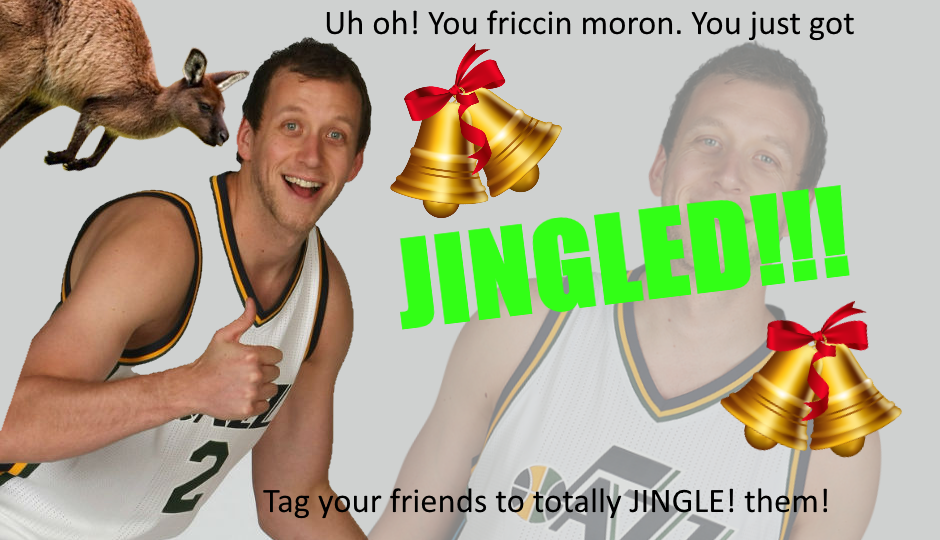

In [87]:
#Image.open("jingled.png")

In [92]:
master_recommender

name,Chandler Parsons,Evan Turner,Allen Crabbe,DeAndre' Bembry,Damian Jones,John Collins,Trae Young,Kevin Huerter,Alex Len,Jabari Parker,Jaylen Brown,Jayson Tatum,Gordon Hayward,Semi Ojeleye,Robert Williams,Marcus Smart,Kemba Walker,Daniel Theis,Enes Kanter,Brad Wanamaker,...,Rajon Rondo,Avery Bradley,Jae Crowder,Solomon Hill,Miles Plumlee,Josh Jackson,Andre Iguodala,Dillon Brooks,Ivan Rabb,Jaren Jackson Jr.,Grayson Allen,Kyle Anderson,Dwight Howard,Yuta Watanabe,De'Anthony Melton,Bruno Caboclo,Tyus Jones,Jonas Valančiūnas,Goran Dragić,Meyers Leonard
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chandler Parsons,0.000000,0.941223,0.734214,0.701477,0.860443,1.583136,1.232872,0.862307,1.436886,1.297491,1.175270,1.316582,0.972697,0.600258,1.061057,0.973440,1.173850,1.011031,1.506362,0.605600,...,0.875374,0.886215,0.910007,0.452041,0.929658,1.389209,0.920734,0.683994,1.100847,1.464492,0.504332,1.211347,1.587032,0.559203,0.716139,0.557403,0.631393,1.632717,1.089625,0.773002
Evan Turner,0.941223,0.000000,1.096476,0.864415,1.101743,1.201921,0.917804,0.977037,1.202197,1.142066,1.296694,1.163472,1.144891,0.936926,1.152741,0.779481,1.074608,1.220566,1.109534,0.848872,...,0.814499,1.116777,1.429224,0.911529,1.105547,0.737398,0.616180,0.821587,0.831891,1.153324,0.887818,0.919913,1.037264,0.753834,0.654822,0.995480,0.703784,0.965435,1.127824,0.857664
Allen Crabbe,0.734214,1.096476,0.000000,1.370471,1.401180,1.310235,0.877624,0.265699,1.513247,1.186378,0.701454,0.806813,1.268142,0.971438,1.360012,0.640180,0.677937,1.281075,1.551399,0.912195,...,1.235414,0.585988,0.568118,0.841899,1.559121,0.977461,1.086790,0.516857,1.396892,0.974075,0.779844,1.427384,1.440408,1.073715,0.905997,0.932465,1.001113,1.324423,0.992373,0.781031
DeAndre' Bembry,0.701477,0.864415,1.370471,0.000000,0.320814,1.496288,1.580203,1.241412,0.984850,1.510231,1.271936,1.724345,0.977578,0.263673,0.502154,1.202718,1.740725,0.607735,1.304594,0.498823,...,0.898337,1.521414,1.328590,0.427108,0.330536,1.298531,0.765767,1.015721,0.558448,1.506648,0.471836,0.538099,1.353577,0.364474,0.532595,0.360894,0.440760,1.499132,1.524684,0.692832
Damian Jones,0.860443,1.101743,1.401180,0.320814,0.000000,1.168783,1.675456,1.451555,0.757932,1.460217,1.406394,1.741860,0.920426,0.453831,0.105482,1.558194,1.764971,0.398118,1.006577,0.471863,...,1.262578,1.648555,1.430552,0.731474,0.092303,1.536899,0.820766,1.129827,0.174899,1.237079,0.577167,0.668295,1.023469,0.561082,0.905608,0.454425,0.772892,1.106941,1.596551,0.516910
John Collins,1.583136,1.201921,1.310235,1.496288,1.168783,0.000000,0.824139,1.272729,0.322777,0.298458,0.657390,0.522290,0.925999,1.640930,1.006993,1.230528,0.834716,0.799754,0.145494,1.572360,...,1.014899,0.900259,0.978130,1.667968,1.092153,0.656178,1.112807,1.246909,0.948655,0.325387,1.757477,0.995248,0.189196,1.696163,1.559837,1.604048,1.724352,0.112334,0.722033,1.258557
Trae Young,1.232872,0.917804,0.877624,1.580203,1.675456,0.824139,0.000000,0.664867,1.309761,0.502587,0.759154,0.423358,0.798125,1.681329,1.621036,0.481079,0.118682,1.666123,0.964929,1.528012,...,0.631203,0.512772,0.854755,1.500246,1.634857,0.472350,1.204052,0.959383,1.596342,0.752888,1.408057,1.472353,0.844602,1.475767,1.175530,1.594060,1.326165,0.903527,0.267198,1.610792
Kevin Huerter,0.862307,0.977037,0.265699,1.241412,1.451555,1.272729,0.664867,0.000000,1.547893,1.188928,0.681602,0.741532,1.278375,1.055933,1.413813,0.404750,0.640215,1.371638,1.521263,1.058535,...,0.821568,0.506607,0.710319,0.869001,1.535147,0.826840,0.964109,0.522206,1.446141,0.980797,0.977812,1.174475,1.411963,1.168352,0.626433,1.049655,0.896706,1.314993,0.915060,0.984529
Alex Len,1.436886,1.202197,1.513247,0.984850,0.757932,0.322777,1.309761,1.547893,0.000000,0.812509,0.854548,0.932026,1.037194,1.101748,0.672948,1.430475,1.363711,0.384143,0.221512,1.336010,...,1.023209,1.281210,0.903233,1.170295,0.576954,0.974718,1.083111,1.447326,0.739845,0.661540,1.438689,0.701928,0.403441,1.295495,1.385549,1.247437,1.346540,0.395827,1.018245,1.084477


In [100]:

query = 'Par'#input("name your player of interest: ")
career_df.loc[career_df['name'].str.contains(query),'name']



0    Chandler Parsons
9       Jabari Parker
Name: name, dtype: object